<a href="https://colab.research.google.com/github/Qxr2427/MachineLearning-Opensource-Projects/blob/master/MNIST_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST data set
MNIST is publicly available image data set which consists of 28 by 28 pixels image of hand-written single digits. So each image in MNIST is an image of a digit from 0 to 9. MNIST challenge is to develop a machine learning algorithm that can classify these images into 10 classes (0 to 9).

### Preparation?
You can run this notebook on [google Fashion MNIST colaboratory](https://colab.research.google.com/drive/14g8K9thl8rHhZkpvzUcmp1QyWp5kAV4t) and you do not need to run on your own machine (you certainly can use your machine if you prefer!). 

In this notebook, we get ourselves familiar with MNIST data set and tensorflow's handy API to access MNIST. 

For this HW, I would like everyone to try build a ML model to predict MNIST human hand writing. 

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


Using TensorFlow backend.


Import MNIST problem dataset

In [0]:
classic_mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [0]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four',
               'Five', 'Six', 'Seven', 'Eight', 'Nine']

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

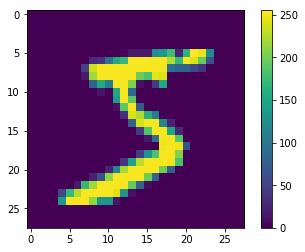

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Display the first 25 images from the training set and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

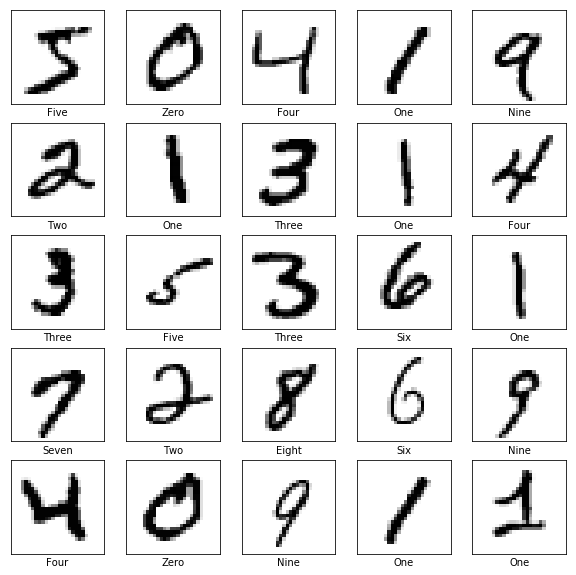

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Starting from here, you need to continue by yourself. If you dont know what to do, you can reference to the Fashion MNIST we did in class. The goal for this HW is create a neural network ML model and get 90%+ accuracy on test data set.

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

W0706 18:55:24.724811 140262884636544 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [0]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model.fit(train_images, train_labels, epochs=100,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])


.........................

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 24us/sample - loss: 0.1717 - acc: 0.9558
Test accuracy: 0.9558


In [0]:
predictions = model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

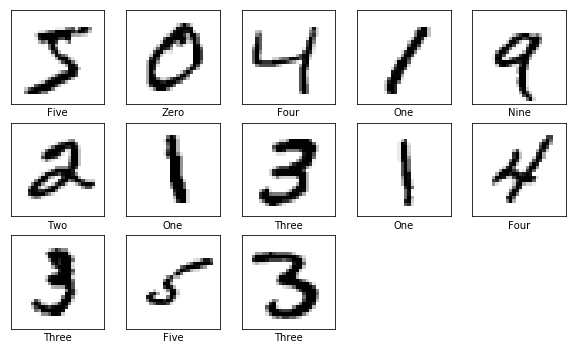

In [0]:
plt.figure(figsize=(10,10))
for i in range(13):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
#type in here 
predictions = model.predict(test_images)
predictions[2]
np.argmax(predictions[3])


0